=== Logistic Regression Metrics ===
              precision    recall  f1-score   support

           0       0.72      1.00      0.84        31
           1       1.00      0.14      0.25        14

    accuracy                           0.73        45
   macro avg       0.86      0.57      0.54        45
weighted avg       0.81      0.73      0.65        45

Confusion Matrix:
 [[31  0]
 [12  2]]
Logistic Regression ROC-AUC: 0.744

=== Random Forest Metrics ===
              precision    recall  f1-score   support

           0       0.82      0.87      0.84        31
           1       0.67      0.57      0.62        14

    accuracy                           0.78        45
   macro avg       0.74      0.72      0.73        45
weighted avg       0.77      0.78      0.77        45

Confusion Matrix:
 [[27  4]
 [ 6  8]]
Random Forest ROC-AUC: 0.794



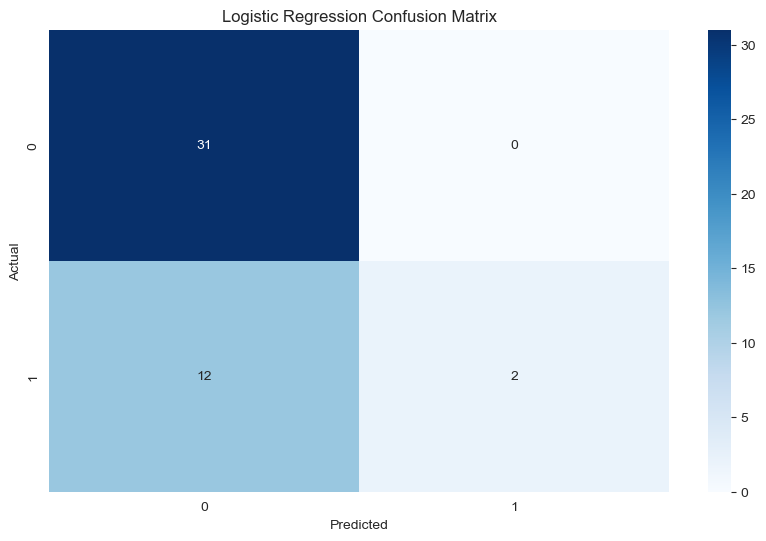

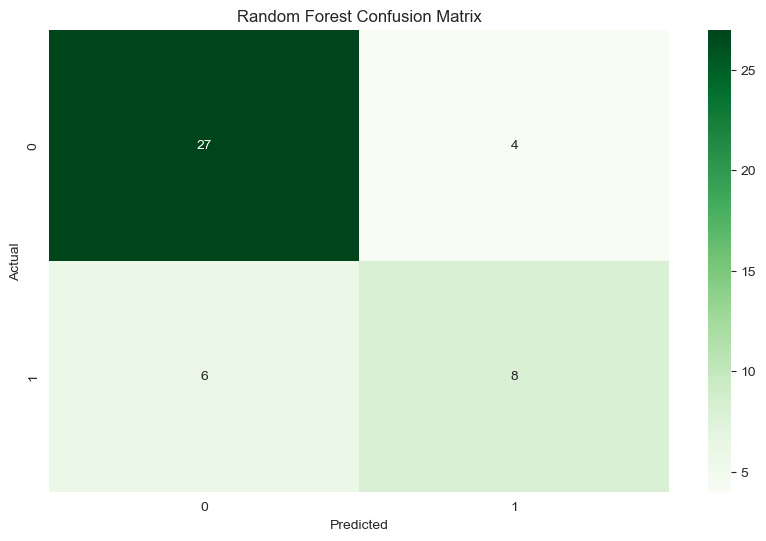

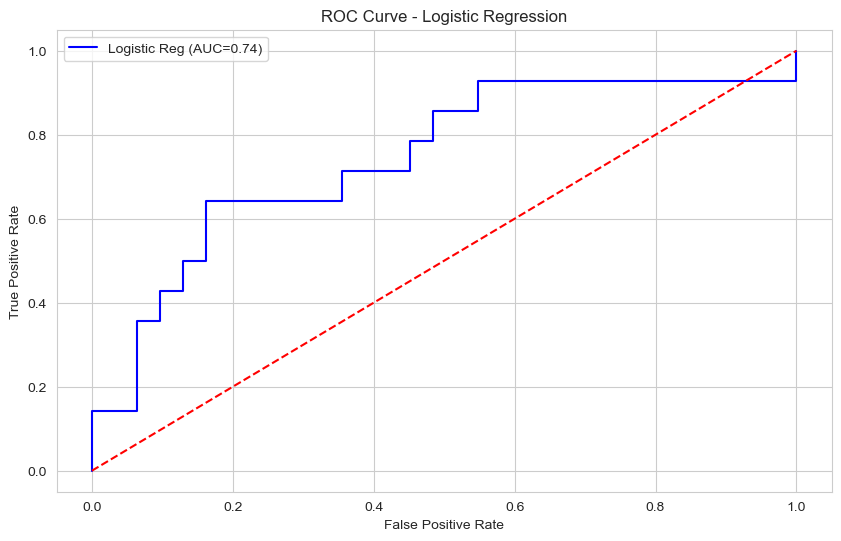

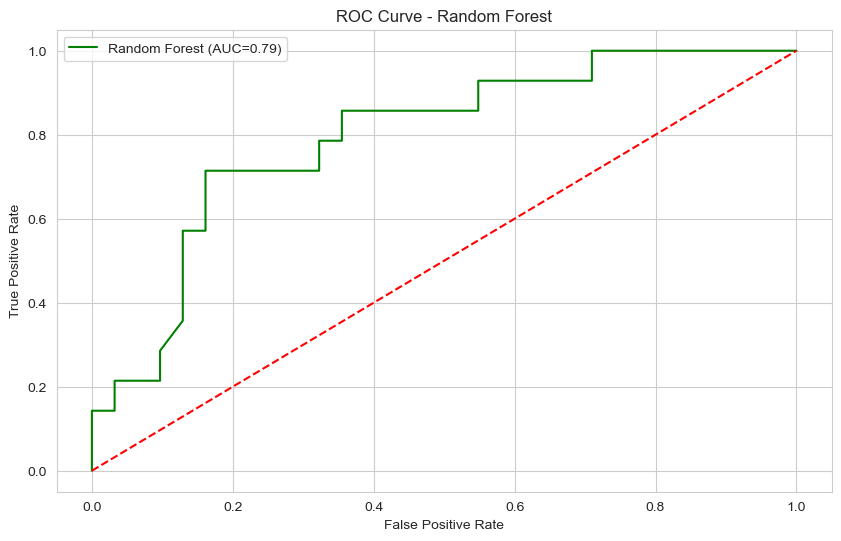

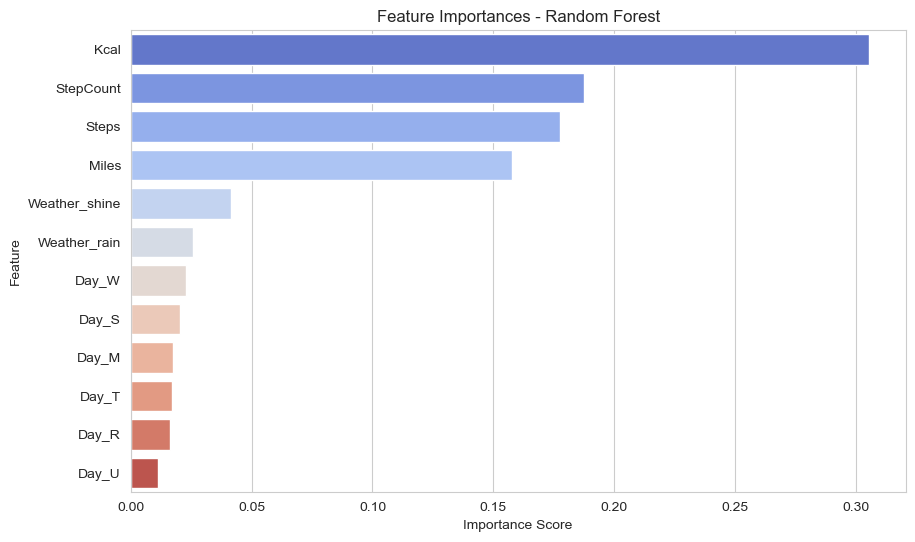

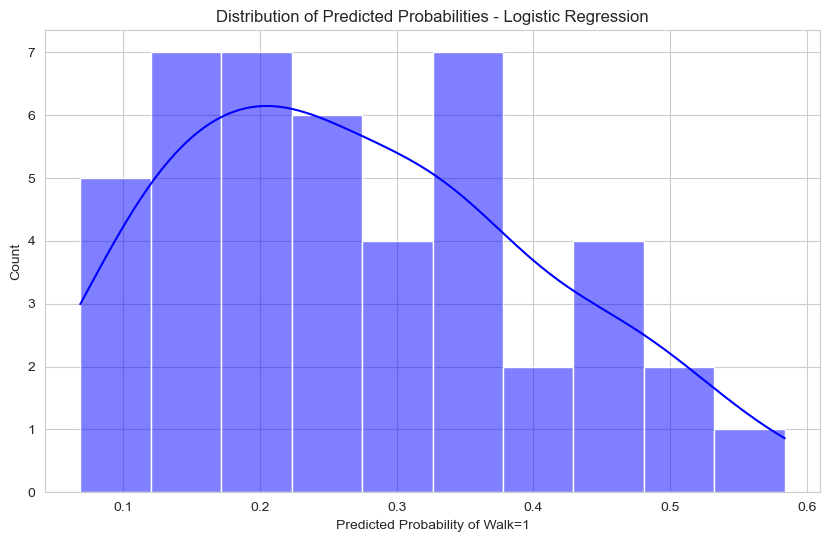

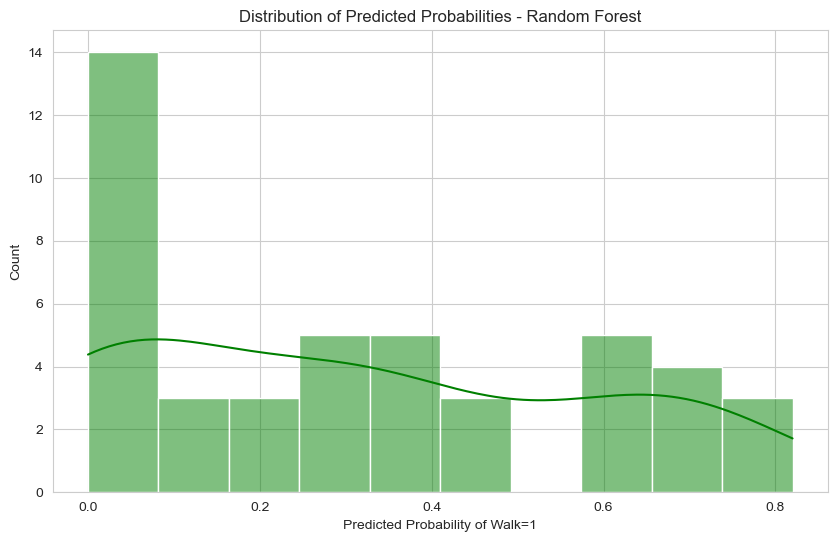

In [2]:
# MODELING NOTEBOOK CODE FOR "WalkTheDogs.csv"

# 1. Imports and Setup 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

# For plots
plt.rcParams['figure.figsize'] = (10, 6)
sns.set_style('whitegrid')

# 2. Data Loading
data = pd.read_csv("WalkTheDogs.csv")

# 3. Feature Selection and Target Definition

features = ['StepCount', 'Kcal', 'Miles', 'Weather', 'Day', 'Steps']
target = 'Walk'

X = data[features]
y = data[target]

# 4. Encoding Categorical Features 
# 'Weather' and 'Day' are categorical => One-hot encode them.
categorical_cols = ['Weather', 'Day']
numeric_cols = ['StepCount', 'Kcal', 'Miles', 'Steps']

# One-hot encode using pandas.get_dummies (simple approach):
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, 
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    stratify=y)

# 6.Scaling the Numerical Columns
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled  = X_test.copy()

# Identify the numeric columns again in X_encoded
encoded_numeric = ['StepCount', 'Kcal', 'Miles', 'Steps']
# Scale
X_train_scaled[encoded_numeric] = scaler.fit_transform(X_train_scaled[encoded_numeric])
X_test_scaled[encoded_numeric] = scaler.transform(X_test_scaled[encoded_numeric])

# 7. Model Training: Logistic Regression
log_clf = LogisticRegression(solver='saga', max_iter=2000, C=1.0, random_state=42)
log_clf.fit(X_train_scaled, y_train)

# Predictions
y_pred_log = log_clf.predict(X_test_scaled)
y_prob_log = log_clf.predict_proba(X_test_scaled)[:, 1]

# Evaluate
print("=== Logistic Regression Metrics ===")
print(classification_report(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

log_roc_auc = roc_auc_score(y_test, y_prob_log)
print(f"Logistic Regression ROC-AUC: {log_roc_auc:.3f}\n")

# 8. Model Training: Random Forest Classifier 
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_scaled, y_train)

y_pred_rf = rf_clf.predict(X_test_scaled)
y_prob_rf = rf_clf.predict_proba(X_test_scaled)[:, 1]

print("=== Random Forest Metrics ===")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

rf_roc_auc = roc_auc_score(y_test, y_prob_rf)
print(f"Random Forest ROC-AUC: {rf_roc_auc:.3f}\n")

# 9. Plots (We’ll generate at least 7) 

# Plot 1: Confusion Matrix - Logistic Regression
cm_log = confusion_matrix(y_test, y_pred_log)
plt.figure()
sns.heatmap(cm_log, annot=True, cmap='Blues', fmt='d')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot 2: Confusion Matrix - Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure()
sns.heatmap(cm_rf, annot=True, cmap='Greens', fmt='d')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot 3: ROC Curve - Logistic Regression
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
plt.figure()
plt.plot(fpr_log, tpr_log, label=f"Logistic Reg (AUC={log_roc_auc:.2f})", color='blue')
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

# Plot 4: ROC Curve - Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
plt.figure()
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC={rf_roc_auc:.2f})", color='green')
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

# Plot 5: Feature Importances (Random Forest)
importances = rf_clf.feature_importances_
feature_names = X_train_scaled.columns

# Put into a Series for easy plotting
imp_series = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure()
sns.barplot(x=imp_series.values, y=imp_series.index, palette='coolwarm')
plt.title("Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# Plot 6: Distribution of Predicted Probabilities (Logistic Regression)
plt.figure()
sns.histplot(y_prob_log, bins=10, kde=True, color='blue')
plt.title("Distribution of Predicted Probabilities - Logistic Regression")
plt.xlabel("Predicted Probability of Walk=1")
plt.ylabel("Count")
plt.show()

# Plot 7: Distribution of Predicted Probabilities (Random Forest)
plt.figure()
sns.histplot(y_prob_rf, bins=10, kde=True, color='green')
plt.title("Distribution of Predicted Probabilities - Random Forest")
plt.xlabel("Predicted Probability of Walk=1")
plt.ylabel("Count")
plt.show()
